### 1. Defining the problem statement and Goal


### 2. Collecting the Data
- Train data set and test data set을 가지고 있는 파일 load

In [3]:
import pandas as pd
df_AOP = pd.read_csv('sample.csv')

df_AOP.head()

,measSetId,probeId,beamstyleIndex,txFrequencyHz,focusRangeCm,numTxElements,txpgWaveformStyle,numTxCycles,elevAperIndex,IsTxAperModulationEn,probeName,probePitchCm,probeRadiusCm,probeElevAperCm0,probeElevFocusRangCm,measResId,zt,RankNo
0,1,11291796,0,1538500.0,2.0,47,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,678,5.1,1
1,2,11291796,0,1538500.0,4.0,93,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,369,4.4,1
2,3,11291796,0,1538500.0,6.0,96,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,370,4.5,1
3,4,11291796,0,1538500.0,8.0,96,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,371,4.7,1
4,5,11291796,0,1538500.0,10.0,96,2,2.0,0,1,5V1,0.0215,0.0,1.2,6.0,372,4.6,1


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set() # setting seaborn default for plots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df_AOP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6402 entries, 0 to 6401
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   measSetId             6402 non-null   int64  
 1   probeId               6402 non-null   int64  
 2   beamstyleIndex        6402 non-null   int64  
 3   txFrequencyHz         6402 non-null   float64
 4   focusRangeCm          6402 non-null   float64
 5   numTxElements         6402 non-null   int64  
 6   txpgWaveformStyle     6402 non-null   int64  
 7   numTxCycles           6402 non-null   float64
 8   elevAperIndex         6402 non-null   int64  
 9   IsTxAperModulationEn  6402 non-null   int64  
 10  probeName             6402 non-null   object 
 11  probePitchCm          6402 non-null   float64
 12  probeRadiusCm         6402 non-null   float64
 13  probeElevAperCm0      6402 non-null   float64
 14  probeElevFocusRangCm  6402 non-null   float64
 15  measResId            

In [10]:
df_AOP['zt'].describe()

count    6402.000000
mean        2.790159
std         1.591822
min         0.500000
25%         1.300000
50%         3.000000
75%         4.300000
max         6.600000
Name: zt, dtype: float64

<AxesSubplot:xlabel='zt', ylabel='Density'>

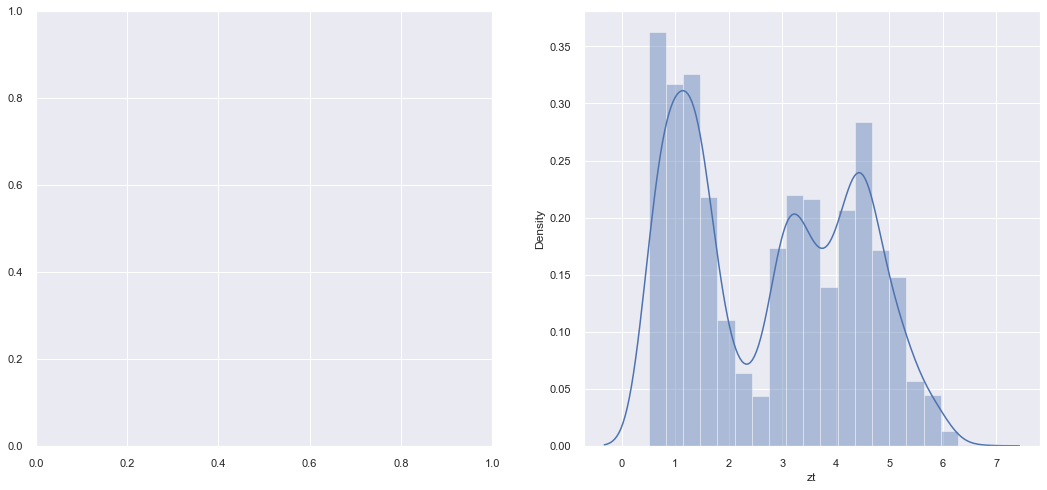

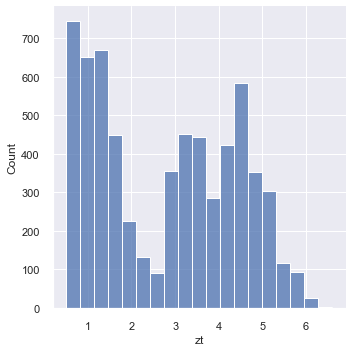

In [26]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.displot(df_AOP['zt'], ax=ax[0])
sns.distplot(df_AOP['zt'], ax=ax[1])

#### zt에 대한 통계적 분포 및 데이터의 실효성 확인

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df_AOP['zt'].skew())
print("Kurtosis: %f" % df_AOP['zt'].kurt())

Skewness: 0.117000
Kurtosis: -1.358268


#### Relationship with numerical variables

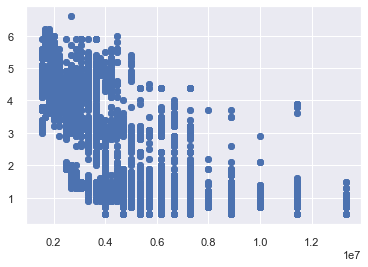

In [24]:
plt.scatter(df_AOP['txFrequencyHz'], df_AOP['zt'])

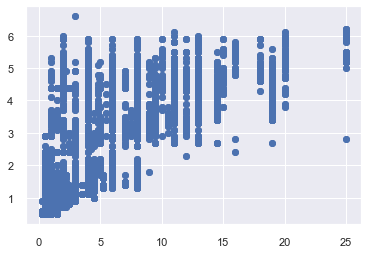

In [20]:
plt.scatter(df_AOP['focusRangeCm'], df_AOP['zt'])

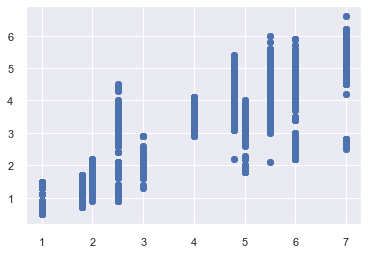

In [21]:
plt.scatter(df_AOP['probeElevFocusRangCm'], df_AOP['zt'])

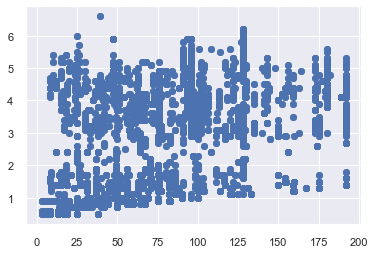

In [27]:
plt.scatter(df_AOP['numTxElements'], df_AOP['zt'])

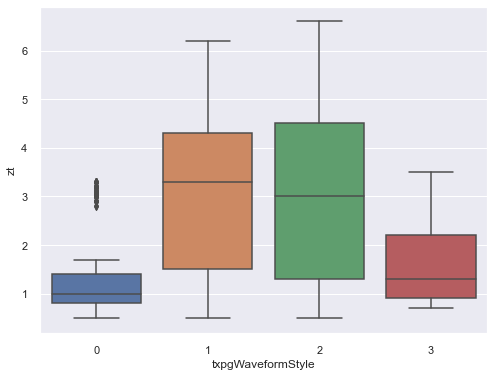

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(df_AOP['txpgWaveformStyle'], df_AOP['zt'], data=df_AOP)

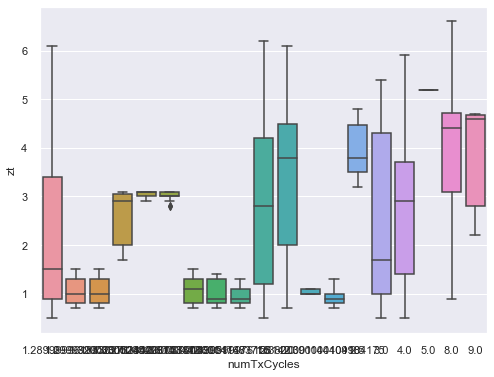

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(df_AOP['numTxCycles'], df_AOP['zt'], data=df_AOP)

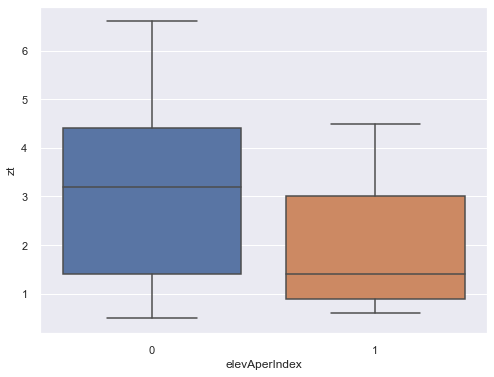

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(df_AOP['elevAperIndex'], df_AOP['zt'], data=df_AOP)

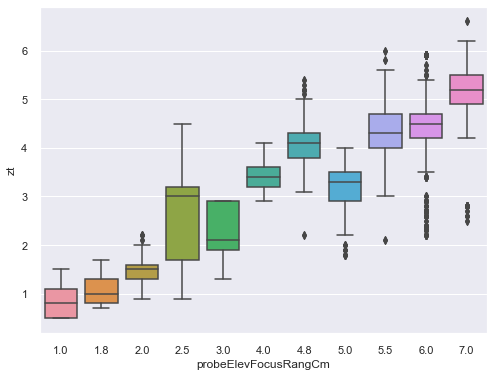

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(round(df_AOP['probeElevFocusRangCm'],3), df_AOP['zt'], data=df_AOP)

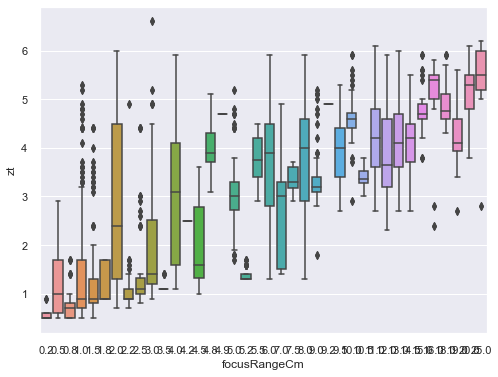

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(round(df_AOP['focusRangeCm'],1), df_AOP['zt'], data=df_AOP)

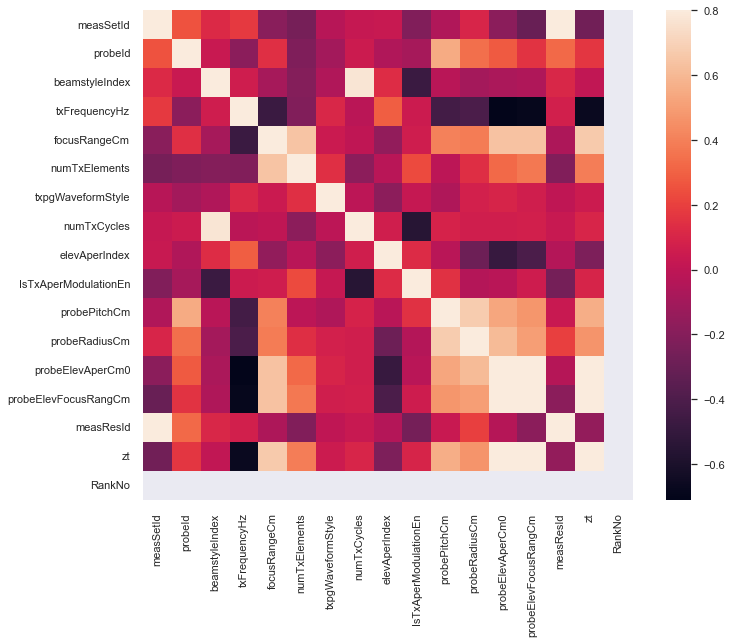

In [39]:
#correlation matrix
corrmat = df_AOP.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

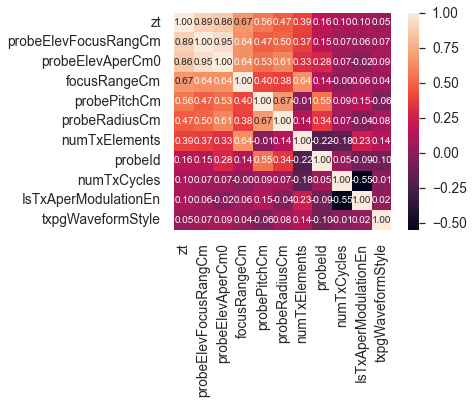

In [50]:
#zt correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'zt')['zt'].index
cm = np.corrcoef(df_AOP[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()